In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from datetime import datetime
from datetime import date

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#data = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')
#data = data_1.sample(n = 5000 , random_state = 42)
data  =  pd.read_csv('lung_cancer_mortality_data_test_v2.csv')

In [5]:
data.shape

(1000, 18)

In [87]:
#data = data_1.sample(n = 5000, random_state = 42)

### Chi-square test

#### Chi-square test is used to compute p-value used to see the relationship between binary type features.
#### If p-value < 0.05, this means both features have significant relationship

In [6]:
cross_hy = pd.crosstab(data["hypertension"], data["survived"])

cross_as = pd.crosstab(data["asthma"], data["survived"])

cross_ci = pd.crosstab(data["cirrhosis"], data["survived"])

cross_oc = pd.crosstab(data["other_cancer"], data["survived"])

In [7]:
from scipy.stats import chi2_contingency

In [8]:
chi2, p, dof, expected = chi2_contingency(cross_hy)
print(f"p_hypertension: {p}")

p_hypertension: 0.1579234811640775


In [9]:
chi2, p, dof, expected = chi2_contingency(cross_oc)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value_cirhosis: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 0.3507921157518177
P-Value_cirhosis: 0.553665074726122
Degrees of Freedom: 1
Expected Frequencies:
[[710.776 191.224]
 [ 77.224  20.776]]


In [10]:
chi2, p, dof, expected = chi2_contingency(cross_as)
print(f"p_asthama: {p}")

p_asthama: 0.8638004904170378


In [11]:
chi2, p, dof, expected = chi2_contingency(cross_ci)
print(f"p_other_cancer: {p}")

p_other_cancer: 0.7886875432582311


# Machine learning models

In [12]:
#data = pd.read_csv('lung_cancer_mortality_data_large_v2.csv') # the large data set
#data = data_1.sample(n = 20000 , random_state = 42)

#data = pd.read_csv('lung_cancer_mortality_data_large_v2.csv') # the large data set

# the following file is from two data sets large dataset and test dataset
#data = pd.read_csv('lung_cancer_mortality_data_for_machine_learning_project.csv')

# the folllowing file is from one dataset
#data = pd.read_csv('lung_cancer_mortality_data_from_large_data_set.csv')

#data  =  pd.read_csv('lung_cancer_mortality_data_test_v2.csv') # the test data set
data = pd.read_csv('lung_cancer_mortality_sample_new.csv')
data.head()

In [13]:
data['survived'].value_counts()

survived
0    788
1    212
Name: count, dtype: int64

### Another way for resampling

In [4]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['survived']==0)] 
df_minority = data[(data['survived']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2536298, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_minority_upsampled, df_majority])
data = pd.concat([df_minority_upsampled, df_majority])

In [14]:
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0


In [15]:
data['survived'].value_counts()

survived
0    788
1    212
Name: count, dtype: int64

# Selecting features for models

In [16]:
# Delete the id	 and the salary column.
data = data.drop(["id","diagnosis_date","beginning_of_treatment_date","end_treatment_date","country"], axis=1)

# the following one for 'lung_cancer_mortality_data_for_machine_learning_project.csv' 
#data = data.drop(["Unnamed: 0","id","diagnosis_date","beginning_of_treatment_date","end_treatment_date"], axis=1)

# change the data type int for age
data['age'] = data['age'].astype(int)

data.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,Female,Stage IV,No,Former Smoker,21.2,191,0,0,0,0,Surgery,0
1,50,Male,Stage III,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,0
2,65,Male,Stage II,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,1
3,51,Male,Stage I,No,Passive Smoker,38.8,279,1,0,0,0,Combined,0
4,37,Female,Stage II,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,0


# Encoding categorial variables (One-hot encoding)

In [17]:
# Transform the categorical variables into one-hot encoded variables, true/false or 0/1 
# After this, no object type should appear in our dataset. Machine learning models do not handle features with object data typ

def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe
for column in data.columns:
    if data[column].dtype == object:
        data = _transform_column_into_dummies(data, column)
    
data.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender = _Female,gender = _Male,...,family_history = _No,family_history = _Yes,smoking_status = _Current Smoker,smoking_status = _Former Smoker,smoking_status = _Never Smoked,smoking_status = _Passive Smoker,treatment_type = _Chemotherapy,treatment_type = _Combined,treatment_type = _Radiation,treatment_type = _Surgery
0,64,21.2,191,0,0,0,0,0,True,False,...,True,False,False,True,False,False,False,False,False,True
1,50,36.4,258,1,0,0,0,0,False,True,...,False,True,True,False,False,False,True,False,False,False
2,65,18.9,174,1,0,1,0,1,False,True,...,False,True,False,True,False,False,True,False,False,False
3,51,38.8,279,1,0,0,0,0,False,True,...,True,False,False,False,False,True,False,True,False,False
4,37,37.7,273,0,0,0,0,0,True,False,...,False,True,False,True,False,False,False,True,False,False


### Select the target set

In [18]:
# Generate a synthetic imbalanced dataset
X = data.drop("survived" , axis=1) 
y = data["survived"]

### Perform a train/test split with test_size=0.2 (80/20 split) and a random_state of 42.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalizing the Data
#### Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
X_test = scaler.fit_transform(X_test)

### Apply SMoTE to the training set

In [21]:
# !pip install imbalanced-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [22]:
# Check the distribution of the target variable in the training set
print("Original class distribution:", np.bincount(y_train))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after applying SMOTE
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [630 170]
Resampled class distribution: [630 630]


### Creating the models by using SMoTE 

### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Train a model on the resampled dataset
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
#lr.fit(X_train, y_train)
# Evaluate the model on the test set
#y_pred = lr.predict(X_test)
lr_predictions = lr.predict(X_test)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69       158
           1       0.22      0.40      0.28        42

    accuracy                           0.56       200
   macro avg       0.50      0.51      0.48       200
weighted avg       0.67      0.56      0.60       200



In [24]:
from sklearn.metrics import recall_score, accuracy_score, f1_score
lr_acc = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy Score: {lr_acc}")

lr_acc = f1_score(y_test, lr_predictions)
print(f"Logistic Regression F1-Score: {lr_acc}")

Logistic Regression Accuracy Score: 0.565
Logistic Regression F1-Score: 0.2809917355371901


In [42]:
#pred = lr.predict(X_test)
#proba =lr.predict_proba(X_test)
#print(f'predictions: {pred}, probabilities: {proba}')

In [41]:
#y_test.value_counts()

In [40]:
#len(y_test)

In [39]:
#y_train.value_counts()

In [215]:
#comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted values':lr_predictions})
#comparison_df

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Train a model on the resampled dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
dt_predictions = dt.predict(X_test)
print(classification_report(y_test,dt_predictions ))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       158
           1       0.24      0.38      0.30        42

    accuracy                           0.62       200
   macro avg       0.52      0.53      0.52       200
weighted avg       0.69      0.62      0.65       200



### Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train a model on the resampled dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
#rf.fit(X_train, y_train)

# Evaluate the model on the test set
rf_predictions = rf.predict(X_test)
print(classification_report(y_test, rf_predictions ))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       158
           1       0.23      0.07      0.11        42

    accuracy                           0.76       200
   macro avg       0.51      0.50      0.48       200
weighted avg       0.67      0.76      0.70       200



In [27]:
from sklearn.metrics import precision_score
precision_rf = precision_score(y_test, rf_predictions)
print(f"Random Forest Precision Score: {precision_rf}")

Random Forest Precision Score: 0.23076923076923078


In [28]:
from sklearn.metrics import recall_score
recall_rf = recall_score(y_test, rf_predictions)
print(f"Random Forest recall Score: {recall_rf}")

Random Forest recall Score: 0.07142857142857142


### Check the importance of features

In [30]:
feature_importances = pd.DataFrame(
    rf.feature_importances_, 
    index =X.columns,  
    columns=['importance']
).sort_values('importance', ascending=False)
#feature_importances

In [1]:
# Extra: For the random forest model, plot the feature importance for each of the variables.
feat_importances = pd.DataFrame()
feat_importances["column name"] = feature_importances.index[0:23]
feat_importances["importance"] =feature_importances.values[0:23]
#feat_importances["importance"] = sorted(rf.feature_importances_)

import seaborn as sns

sns.barplot(
    data = feat_importances,
    y = "column name",
    x = "importance",
    orient = "h"
)

### Use the metric Accuracy and f1_score for above 3 algorithms

In [36]:
from sklearn.metrics import f1_score, accuracy_score 

# Accuracy measure
lr_acc = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy Score: {lr_acc}")

dt_acc = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy Score: {dt_acc}")

rf_acc = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy Score: {rf_acc} \n")

# F1-score
lr_acc = f1_score(y_test, lr_predictions)
print(f"Logistic Regression F1-Score: {lr_acc}")

dt_acc = f1_score(y_test, dt_predictions)
print(f"Decision Tree F1-Score: {dt_acc}")

rf_acc = f1_score(y_test, rf_predictions)
print(f"Random Forest F1-Score: {rf_acc}")

Logistic Regression Accuracy Score: 0.565
Decision Tree Accuracy Score: 0.62
Random Forest Accuracy Score: 0.755 

Logistic Regression F1-Score: 0.2809917355371901
Decision Tree F1-Score: 0.2962962962962963
Random Forest F1-Score: 0.10909090909090909


### 5-fold cross validation to compute the averaged score for each of the above three models

In [31]:
# Using 5-fold cross validation, compute the averaged score for each of the three models.
# Reference this for the scoring hyperparameter: https://scikit-learn.org/stable/modules/model_evaluation.html
# Note: When defining the KFold, please use a random state of 42!
from sklearn.model_selection import KFold

num_folds = 5
random_state = 42

kfold = KFold(
    n_splits=num_folds,
    random_state=random_state,
    shuffle=True
)

In [32]:
from sklearn.model_selection import cross_val_score

results_Ir = cross_val_score(
    lr, X, y,
    cv=kfold,
    scoring="f1"
)

results_dt = cross_val_score(
    dt, X, y,
    cv=kfold,
    scoring="f1"
)

results_rf = cross_val_score(
    rf, X, y,
    cv=kfold,
    scoring="f1"
)

print(f" F1-score for Logistic regression model:{results_Ir}")
print(f" F1-score for Decision tree:{results_dt}")
print(f" F1-score for Random Forest :{results_rf}")
print(f" Average F1-score for Logistic regression model:{results_Ir.mean()}")
print(f" Average F1-score for Decision tree:{results_dt.mean()}")
print(f" Average F1-score for Random Forest :{results_rf.mean()}")

C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

 F1-score for Logistic regression model:[0. 0. 0. 0. 0.]
 F1-score for Decision tree:[0.26262626 0.11363636 0.13636364 0.26666667 0.2195122 ]
 F1-score for Random Forest :[0.13043478 0.09090909 0.         0.125      0.1       ]
 Average F1-score for Logistic regression model:0.0
 Average F1-score for Decision tree:0.19976102488297612
 Average F1-score for Random Forest :0.08926877470355732


## Machine learning models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from datetime import datetime
from datetime import date

In [2]:
#data_1 = pd.read_csv('lung_cancer_mortality_data_large_v2.csv') # the large data set
#data = data_1.sample(n = 8000 , random_state = 42)
#data  =  pd.read_csv('lung_cancer_mortality_data_test_v2.csv')
data = pd.read_csv('lung_cancer_mortality_sample_new.csv')
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,2279821,49,Female,Lithuania,01/06/2018,Stage IV,08/06/2018,Yes,Never Smoked,22.0,185,1,0,0,0,Surgery,02/07/2019,0
1,668812,49,Male,Slovakia,18/03/2021,Stage I,03/04/2021,No,Passive Smoker,16.1,232,1,0,1,0,Surgery,22/01/2023,0
2,2512900,54,Female,Luxembourg,25/09/2022,Stage IV,26/09/2022,Yes,Former Smoker,23.4,198,1,0,1,0,Radiation,13/11/2023,0
3,499674,61,Female,Poland,20/10/2014,Stage I,05/11/2014,Yes,Former Smoker,42.4,249,1,0,0,0,Combined,31/08/2016,0
4,892205,68,Male,Portugal,05/11/2022,Stage III,08/11/2022,No,Never Smoked,37.7,242,1,0,1,0,Radiation,20/12/2023,1


In [3]:
data.shape

(162500, 18)

In [4]:
# selection of features

# Delete the id	 and the salary column.
data = data.drop(["id","diagnosis_date","beginning_of_treatment_date","end_treatment_date","country"], axis=1)

# the following one for 'lung_cancer_mortality_data_for_machine_learning_project.csv' 
#data = data.drop(["Unnamed: 0","id","diagnosis_date","beginning_of_treatment_date","end_treatment_date"], axis=1)

# change the data type int for age
data['age'] = data['age'].astype(int)

data.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,49,Female,Stage IV,Yes,Never Smoked,22.0,185,1,0,0,0,Surgery,0
1,49,Male,Stage I,No,Passive Smoker,16.1,232,1,0,1,0,Surgery,0
2,54,Female,Stage IV,Yes,Former Smoker,23.4,198,1,0,1,0,Radiation,0
3,61,Female,Stage I,Yes,Former Smoker,42.4,249,1,0,0,0,Combined,0
4,68,Male,Stage III,No,Never Smoked,37.7,242,1,0,1,0,Radiation,1


In [5]:
# one hote encoding
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe
for column in data.columns:
    if data[column].dtype == object:
        data = _transform_column_into_dummies(data, column)
    
data.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender = _Female,gender = _Male,...,family_history = _No,family_history = _Yes,smoking_status = _Current Smoker,smoking_status = _Former Smoker,smoking_status = _Never Smoked,smoking_status = _Passive Smoker,treatment_type = _Chemotherapy,treatment_type = _Combined,treatment_type = _Radiation,treatment_type = _Surgery
0,49,22.0,185,1,0,0,0,0,True,False,...,False,True,False,False,True,False,False,False,False,True
1,49,16.1,232,1,0,1,0,0,False,True,...,True,False,False,False,False,True,False,False,False,True
2,54,23.4,198,1,0,1,0,0,True,False,...,False,True,False,True,False,False,False,False,True,False
3,61,42.4,249,1,0,0,0,0,True,False,...,False,True,False,True,False,False,False,True,False,False
4,68,37.7,242,1,0,1,0,1,False,True,...,True,False,False,False,True,False,False,False,True,False


In [6]:
data.shape

(162500, 24)

In [7]:
# Select the target set
# Generate a synthetic imbalanced dataset
X = data.drop("survived" , axis=1) 
y = data["survived"]

In [8]:
# Perform a train/test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Normalize the data for Neural network
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Normalize the data for logistic regression and random forest
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X_train)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Applying SMOTE to deal with class imbalance

# !pip install imbalanced-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Check the distribution of the target variable in the training set
print("Original class distribution:", np.bincount(y_train))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after applying SMOTE
print("Resampled class distribution:", np.bincount(y_train))

Original class distribution: [101338  28662]
Resampled class distribution: [101338 101338]


In [23]:
def training(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    score = accuracy_score(pred, y_test)
    score_f1 = f1_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    
    return score_f1*100, score*100, report, cm, pred, proba

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()

#models = [rfc, dtc, lgr]
models = [rfc, lgr]

#names = ["Random Forest", "Decision Tree", "Logistic Regression"]
names = ["Random Forest", "Logistic Regression"]

In [13]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix 

scores_f1, scores, reports, cms, preds, probas = [], [], dict(), dict(), dict(), dict()

for i, j in zip(models, names):
    score_f1, score, report, cm, pred, proba = training(i)
    scores_f1 += [score_f1]
    scores += [score]
    reports[j] = report
    cms[j] = cm
    preds[j] = pred
    probas[j] = proba

In [26]:
scores

[67.41230769230769, 49.38769230769231]

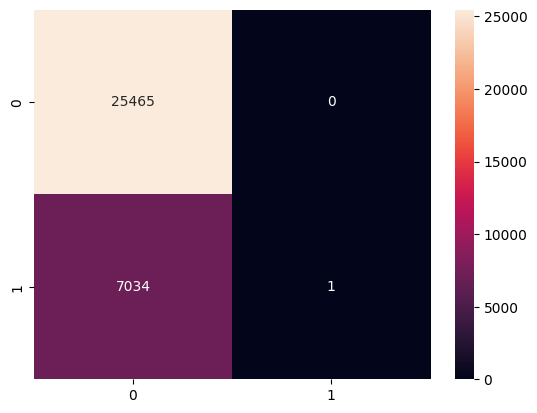

In [22]:
#{'Random Forest': array([[20496,  5622],
#        [ 4969,  1413]], dtype=int64),
# 'Logistic Regression': array([[12462,  3446],
#        [13003,  3589]], dtype=int64)}




### Comparison of Accuracy score for 3 models
#### Models evaluation Accuracy score rated

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_42060\2178567749.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), fontsize = 13, rotation=45)


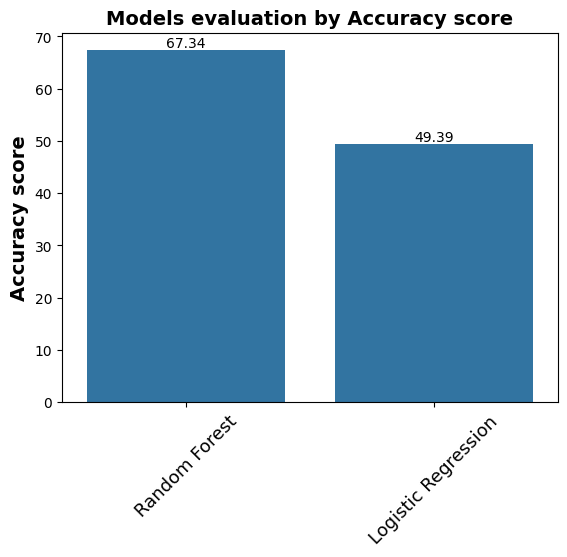

In [14]:
dd = pd.DataFrame({"scores": scores}, index=names).sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 13, rotation=45)
axes.get_yticklabels(())
axes.set_xlabel("")
axes.set_ylabel("Accuracy score", fontweight = 'bold', fontsize = 14, color='black')
axes.set_title("Models evaluation by Accuracy score",fontweight = 'bold', fontsize = 14, color='black')

plt.show()

## Find the optimal threshold for Logistic Regression and Random forest.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()

#models = [rfc, dtc, lgr]
models = [rfc, lgr]

#names = ["Random Forest", "Decision Tree", "Logistic Regression"]
names = ["Random Forest", "Logistic Regression"]

In [28]:
optimal_scores_f1, optimal_accuracy_score, cms = [], [], dict()

### Optimal threshold for accuracy score by Random forest

Optimal Threshold: 0.91
Optimal Accuracy: 0.7835692307692308


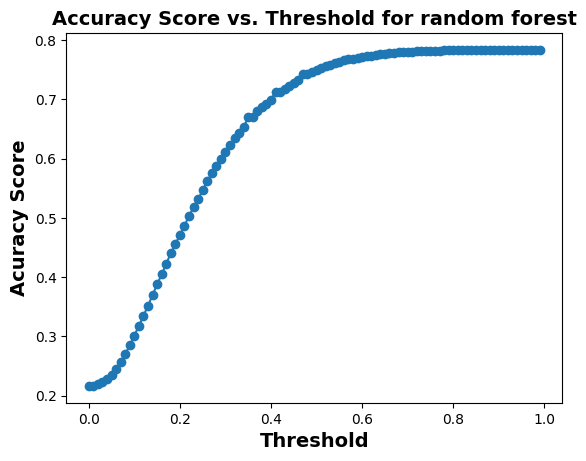

In [13]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Step 3: Predict probabilities on the validation set
y_probs = rfc.predict_proba(X_test)[:, 1]

# Step 4: Find the optimal threshold for accuracy
thresholds = np.arange(0.0, 1.0, 0.01)
accuracy_scores = []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

optimal_threshold = thresholds[np.argmax(accuracy_scores)]
optimal_accuracy_rfc = max(accuracy_scores)

optimal_accuracy_score += [optimal_accuracy_rfc]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal Accuracy: {optimal_accuracy_rfc}")

# Plot the Accuracy-score against thresholds
import matplotlib.pyplot as plt

plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold',fontweight = 'bold', fontsize = 14, color='black')
plt.ylabel('Acuracy Score',fontweight = 'bold', fontsize = 14, color='black')
plt.title('Accuracy Score vs. Threshold for random forest',fontweight = 'bold', fontsize = 14, color='black')
plt.show()
#Optimal Threshold: 0.99
#Optimal Accuracy: 0.7835692307692308

# new_test_data
#y_probs = rfc.predict(new_test_data)
#y_pred = (y_probs >= optimal_threshold).astype(int)

In [23]:
optimal_accuracy_score

[0.7835692307692308, 0.7835384615384615]

### Accuracy with Optimal Threshold and Classification Report with Optimal Threshold for random forest

Accuracy with Optimal Threshold: 0.7835692307692308
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     25465
           1       0.67      0.00      0.00      7035

    accuracy                           0.78     32500
   macro avg       0.73      0.50      0.44     32500
weighted avg       0.76      0.78      0.69     32500



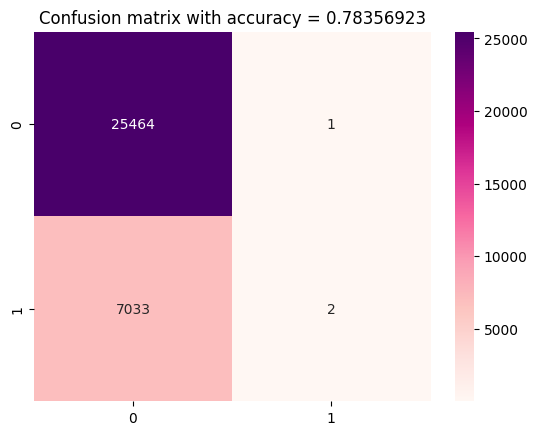

In [14]:
# Step 5: Use the optimal threshold for making predictions on new data
def predict_with_threshold(model, X, threshold):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int)

# Example: Predict on the validation set using the optimal threshold
y_val_pred_optimal_rfc = predict_with_threshold(rfc, X_test, optimal_threshold)

# Evaluate the model with the optimal threshold
print("Accuracy with Optimal Threshold:", accuracy_score(y_test, y_val_pred_optimal_rfc))
#print("Accuracy with Optimal Threshold:", accuracy_score(y_test, y_pred))
# Evaluate the model with the optimal threshold
from sklearn.metrics import classification_report

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_val_pred_optimal_rfc))

# Use the optimal threshold for random forest 
#y_probs_rfc = rfc.predict(X_test)
#y_pred_rfc = (y_probs_rfc > 0.99).astype(int)
cm_rfc = confusion_matrix(y_test,y_val_pred_optimal_rfc)
cms["Random Forest"] = cm_rfc
sns.heatmap(cms['Random Forest'], annot=True,  cmap="RdPu", fmt='d')
plt.title("Confusion matrix with accuracy = 0.78356923")
plt.show()
# Example: Predict on new unseen data using the optimal threshold
# X_new = ... (Load or create your new data)
# y_new_pred = predict_with_threshold(clf, X_new, optimal_threshold)

In [17]:
thresholds = np.arange(0.0, 1.0, 0.02)
thresholds

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [128]:
#rfc.predict_proba(X_test)
#rfc.predict_proba(X_test)[:, 1]

### Optimal threshold for F1 score and Classification report by Random forest

Optimal Threshold: 0.07
Optimal F1-Score: 0.3561073450630919


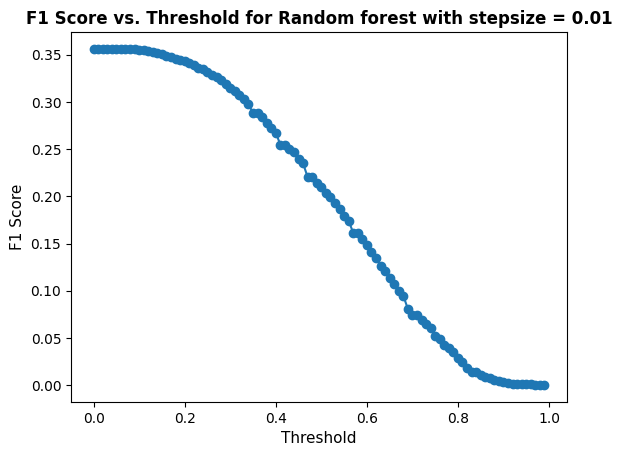

In [14]:
# Step 2: Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predict probabilities on the validation set
y_probs = rfc.predict_proba(X_test)[:, 1]

# Evaluate F1-score for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1_score_rfc = max(f1_scores)

optimal_scores_f1 += [optimal_f1_score_rfc] 

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F1-Score: {optimal_f1_score_rfc}")

# Plot the F1-score against thresholds
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold', fontsize = 11, color='black')
plt.ylabel('F1 Score', fontsize = 11, color='black')
plt.title('F1 Score vs. Threshold for Random forest with stepsize = 0.01',fontweight = 'bold', fontsize = 12, color='black')
plt.show()

#Optimal Threshold: 0.07
#Optimal F1-Score: 0.3561073450630919

In [33]:
optimal_scores_f1 

[0.36]

F1-score with Optimal Threshold: 0.3561073450630919
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.85      0.00      0.01     25465
           1       0.22      1.00      0.36      7035

    accuracy                           0.22     32500
   macro avg       0.53      0.50      0.18     32500
weighted avg       0.71      0.22      0.08     32500



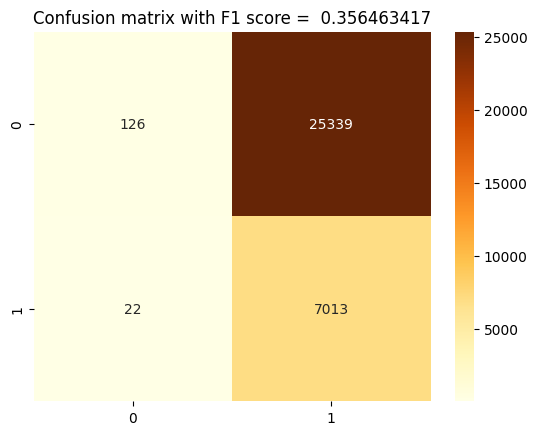

In [15]:
# Step 5: Use the optimal threshold for making predictions on new data
def predict_with_threshold(model, X, threshold):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int)

# Example: Predict on the validation set using the optimal threshold
y_val_pred_optimal = predict_with_threshold(rfc, X_test, optimal_threshold)

# Evaluate the model with the optimal threshold
#print("Accuracy with Optimal Threshold:", f1_score(y_test, y_val_pred_optimal))
print("F1-score with Optimal Threshold:",f1_score(y_test, y_val_pred_optimal))

# Evaluate the model with the optimal threshold
from sklearn.metrics import classification_report

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_val_pred_optimal))

cm_rfc = confusion_matrix(y_test,y_val_pred_optimal)
cms["Random Forest"] = cm_rfc
sns.heatmap(cms['Random Forest'], annot=True,cmap="YlOrBr",fmt='d')
plt.title("Confusion matrix with F1 score =  0.356463417")
plt.show()
# Example: Predict on new unseen data using the optimal threshold
# X_new = ... (Load or create your new data)
# y_new_pred = predict_with_threshold(clf, X_new, optimal_threshold)

In [80]:
optimal_accuracy_score

[0.7835384615384615]

In [24]:
optimal_scores_f1

[0.36]

### Accuracy score with optimal threshold for Logistic regression

C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal Threshold: 0.24
Optimal Accuracy: 0.7835384615384615


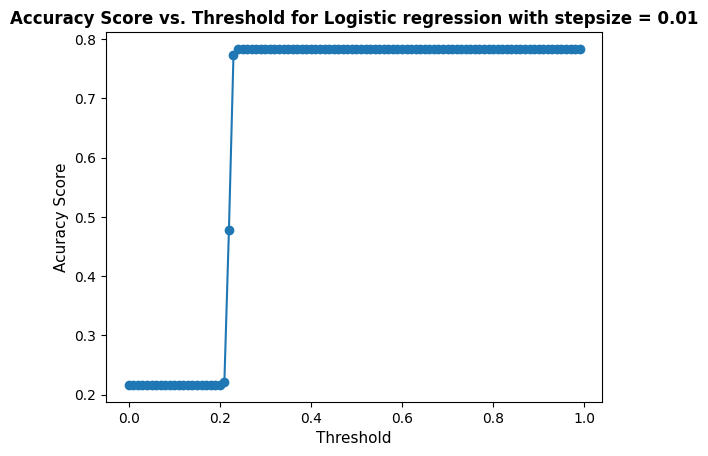

In [29]:
# Step 2: Train a logistic regression
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train, y_train)
# Step 3: Predict probabilities on the validation set
y_probs_lgr = lgr.predict_proba(X_test)[:, 1]

# Step 4: Find the optimal threshold for accuracy
thresholds = np.arange(0.0, 1.0, 0.01)
accuracy_scores = []

for threshold in thresholds:
    y_pred_lgr = (y_probs_lgr >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_lgr)
    accuracy_scores.append(accuracy)

optimal_threshold_lgr = thresholds[np.argmax(accuracy_scores)]
optimal_accuracy_lgr = max(accuracy_scores)

optimal_accuracy_score += [optimal_accuracy_lgr]

print(f"Optimal Threshold: {optimal_threshold_lgr}")
print(f"Optimal Accuracy: {optimal_accuracy_lgr}")

# Plot the Accuracy-score against thresholds
import matplotlib.pyplot as plt

plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold', fontsize = 11, color='black')
plt.ylabel('Acuracy Score', fontsize = 11, color='black')
plt.title('Accuracy Score vs. Threshold for Logistic regression with stepsize = 0.01',fontweight = 'bold', fontsize = 12, color='black')
plt.savefig('name_1.png', transparent=True, dpi=300)
plt.show()
#Optimal Threshold: 0.54
#Optimal Accuracy: 0.7835384615384615
# 0.01,0.001,0.002,0.0001,0.03

Accuracy with Optimal Threshold: 0.7835384615384615
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     25465
           1       0.00      0.00      0.00      7035

    accuracy                           0.78     32500
   macro avg       0.39      0.50      0.44     32500
weighted avg       0.61      0.78      0.69     32500



C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


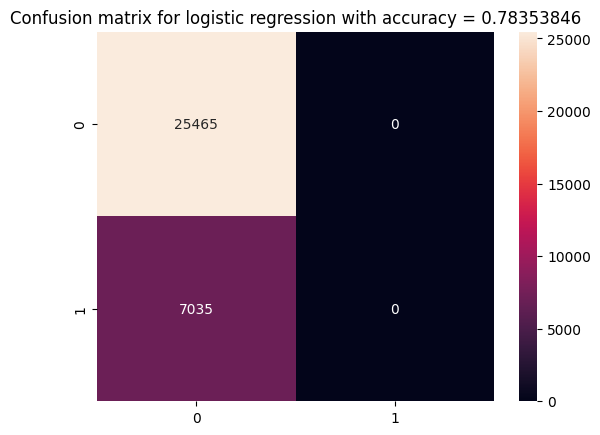

[[25465     0]
 [ 7035     0]]


0.0

In [39]:
# Step 5: Use the optimal threshold for making predictions on new data
def predict_with_threshold(model, X, threshold):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int)

# Example: Predict on the validation set using the optimal threshold
y_val_pred_optimal = predict_with_threshold(lgr, X_test, optimal_threshold_lgr)

# Evaluate the model with the optimal threshold
#print("Accuracy with Optimal Threshold:", f1_score(y_test, y_val_pred_optimal))

# Evaluate the model with the optimal threshold
print("Accuracy with Optimal Threshold:", accuracy_score(y_test, y_val_pred_optimal))
#print("Accuracy with Optimal Threshold:", accuracy_score(y_test, y_pred_lgr))
# Evaluate the model with the optimal threshold
from sklearn.metrics import classification_report,recall_score, precision_score

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_val_pred_optimal))
#print(classification_report(y_test, y_pred_lgr))

cm_lgr = confusion_matrix(y_test,y_val_pred_optimal)
cms["Logistic Regression"] = cm_lgr
sns.heatmap(cms['Logistic Regression'], annot=True, fmt='d')
plt.title("Confusion matrix for logistic regression with accuracy = 0.78353846")
plt.show()
print(confusion_matrix(y_test,y_val_pred_optimal))
recall_score(y_test, y_val_pred_optimal)

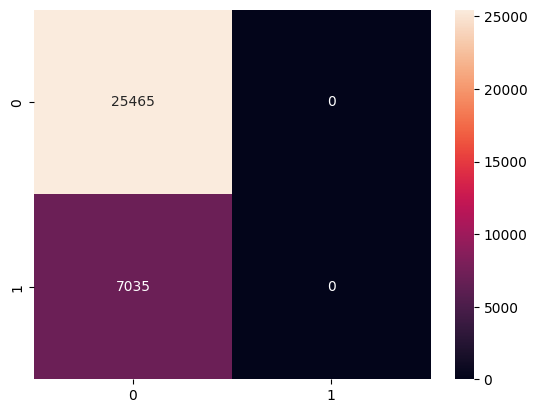

In [26]:
# Use the optimal threshold = 0.54 for logistic regression from above plot
#y_pred_lgr = (y_probs_lgr > 0.54).astype(int)
cm_lgr = confusion_matrix(y_test,y_val_pred_optimal)
cms["Logistic Regression"] = cm_lgr
sns.heatmap(cms['Logistic Regression'], annot=True, fmt='d')
plt.show()

### Optimal threshold for F1 score and Classification report by Logistic Regression

Optimal Threshold: 0.46
Optimal F1-Score: 0.36


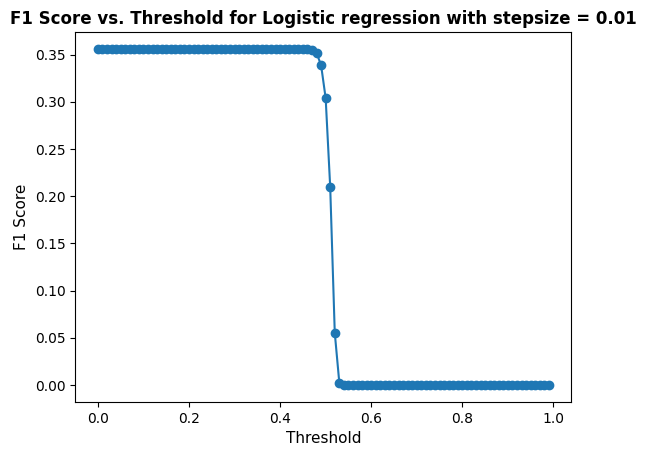

In [56]:
#Step 2: Train a logistic regression
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train, y_train)
# Step 3: Predict probabilities on the validation set
y_probs_lgr = lgr.predict_proba(X_test)[:, 1]

# Evaluate F1-score for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_lgr = (y_probs_lgr >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_lgr)
    f1_scores.append(f1)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1_score_lgr = round(max(f1_scores),2)

optimal_scores_f1 += [optimal_f1_score_lgr] 

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F1-Score: {optimal_f1_score_lgr}")

# Plot the F1-score against thresholds
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold', fontsize = 11, color='black')
plt.ylabel('F1 Score', fontsize = 11, color='black')
plt.title('F1 Score vs. Threshold for Logistic regression with stepsize = 0.01',fontweight = 'bold', fontsize = 12, color='black')
plt.show()



In [21]:
optimal_scores_f1 

[0.36, 0.36]

F1-score with Optimal Threshold: 0.3559223350125307
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.84      0.00      0.00     25465
           1       0.22      1.00      0.36      7035

    accuracy                           0.22     32500
   macro avg       0.53      0.50      0.18     32500
weighted avg       0.71      0.22      0.08     32500



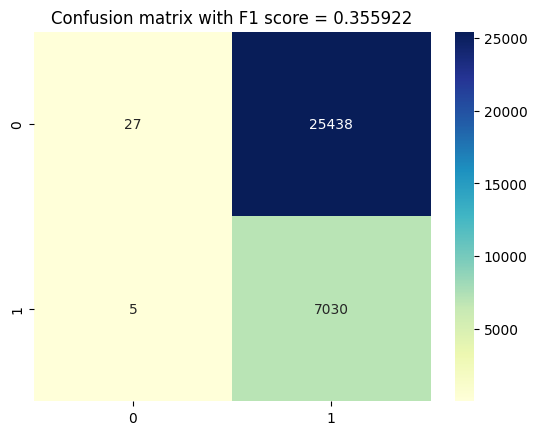

In [58]:
# Step 5: Use the optimal threshold for making predictions on new data
def predict_with_threshold(model, X, threshold):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int)

# Example: Predict on the validation set using the optimal threshold
y_val_pred_optimal = predict_with_threshold(lgr, X_test, optimal_threshold)

# Evaluate the model with the optimal threshold
print("F1-score with Optimal Threshold:", f1_score(y_test, y_val_pred_optimal))
# Evaluate the model with the optimal threshold
#print("F1-score with Optimal Threshold:",optimal_f1_score_lgr)

# Evaluate the model with the optimal threshold
from sklearn.metrics import classification_report

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_val_pred_optimal))

cm_lgr = confusion_matrix(y_test,y_val_pred_optimal)
cms["Logistic Regression"] = cm_lgr
sns.heatmap(cms['Logistic Regression'], annot=True,cmap="YlGnBu", fmt='d')
plt.title("Confusion matrix with F1 score = 0.355922")
plt.show()

### Models evaluation by optimal threshhold

### K fold cross validation score by using optimal threshold for Random Forest (We tried k fold CV, but got same accuracy.) 

In [6]:
average_f1score = []

In [99]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

# Generate a synthetic imbalanced dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, 
#                           weights=[0.1, 0.9], random_state=42)

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics
accuracy_scores = []
f1_scores = []
optimal_thresholds = []

# Cross-validation process
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    y_probs = rfc.predict_proba(X_val)[:, 1]
    
    # Find the optimal threshold for accuracy (can also use for F1-score)
    thresholds = np.arange(0.0, 1.0, 0.01)
    fold_accuracy_scores = []
    fold_f1_scores = []

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        fold_accuracy_scores.append(accuracy)
        fold_f1_scores.append(f1)

    optimal_threshold = thresholds[np.argmax(fold_accuracy_scores)]
    optimal_accuracy = max(fold_accuracy_scores)
    optimal_f1 = fold_f1_scores[np.argmax(fold_accuracy_scores)]
    
    optimal_thresholds.append(optimal_threshold)
    accuracy_scores.append(optimal_accuracy)
    f1_scores.append(optimal_f1)
    
    print(f"Fold Optimal Threshold: {optimal_threshold}")
    print(f"Fold Optimal Accuracy: {optimal_accuracy}")
    print(f"Fold Optimal F1-Score: {optimal_f1}")

# Calculate average performance metrics
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_threshold = np.mean(optimal_thresholds)

average_f1score += [mean_f1]

print(f"\nMean Optimal Threshold: {mean_threshold}")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean F1-Score: {mean_f1}")

Fold Optimal Threshold: 0.72
Fold Optimal Accuracy: 0.781875
Fold Optimal F1-Score: 0.0
Fold Optimal Threshold: 0.6
Fold Optimal Accuracy: 0.781875
Fold Optimal F1-Score: 0.0113314447592068
Fold Optimal Threshold: 0.6
Fold Optimal Accuracy: 0.78125
Fold Optimal F1-Score: 0.005681818181818182
Fold Optimal Threshold: 0.56
Fold Optimal Accuracy: 0.781875
Fold Optimal F1-Score: 0.022408963585434174
Fold Optimal Threshold: 0.59
Fold Optimal Accuracy: 0.781875
Fold Optimal F1-Score: 0.0113314447592068

Mean Optimal Threshold: 0.614
Mean Accuracy: 0.78175
Mean F1-Score: 0.010150734257133191


### K fold cross validation score by using optimal threshold for Logistic regression

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
# Initialize the cross-validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics
accuracy_scores = []
f1_scores = []
optimal_thresholds = []

# Cross-validation process
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    lgr = LogisticRegression()
    lgr.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    y_probs = lgr.predict_proba(X_val)[:, 1]
    
    # Find the optimal threshold for accuracy (can also use for F1-score)
    thresholds = np.arange(0.0, 1.0, 0.01)
    fold_accuracy_scores = []
    fold_f1_scores = []

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        fold_accuracy_scores.append(accuracy)
        fold_f1_scores.append(f1)

    optimal_threshold = thresholds[np.argmax(fold_accuracy_scores)]
    optimal_accuracy = max(fold_accuracy_scores)
    optimal_f1 = fold_f1_scores[np.argmax(fold_accuracy_scores)]
    
    optimal_thresholds.append(optimal_threshold)
    accuracy_scores.append(optimal_accuracy)
    f1_scores.append(optimal_f1)
    
    print(f"Fold Optimal Threshold: {optimal_threshold}")
    print(f"Fold Optimal Accuracy: {optimal_accuracy}")
    print(f"Fold Optimal F1-Score: {optimal_f1}")

# Calculate average performance metrics
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_threshold = np.mean(optimal_thresholds)

average_f1score += [mean_f1]
print(f"\nMean Optimal Threshold: {mean_threshold}")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean F1-Score: {mean_f1}")

C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Optimal Threshold: 0.24
Fold Optimal Accuracy: 0.7803384615384615
Fold Optimal F1-Score: 0.0


C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Optimal Threshold: 0.24
Fold Optimal Accuracy: 0.7803384615384615
Fold Optimal F1-Score: 0.0
Fold Optimal Threshold: 0.24
Fold Optimal Accuracy: 0.7803384615384615
Fold Optimal F1-Score: 0.0


C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Optimal Threshold: 0.24
Fold Optimal Accuracy: 0.7803076923076923
Fold Optimal F1-Score: 0.0


C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Optimal Threshold: 0.24
Fold Optimal Accuracy: 0.7803076923076923
Fold Optimal F1-Score: 0.0

Mean Optimal Threshold: 0.24
Mean Accuracy: 0.7803261538461538
Mean F1-Score: 0.0


C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_26904\2675754400.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),fontsize = 13, rotation=45)


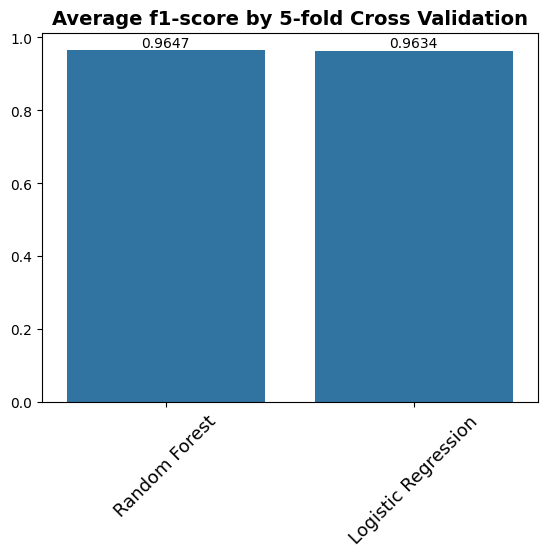

In [197]:
dd_fold = pd.DataFrame({"scores": average_f1score}, index=names_1).sort_values("scores", ascending=False)
dd_fold["scores"] = round(dd_fold["scores"], 4)
fig, axes = plt.subplots()
sns.barplot(x=dd_fold.index, y=dd_fold.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(),fontsize = 13, rotation=45)
axes.get_yticklabels(())
axes.set_xlabel("")
axes.set_ylabel("")
axes.set_title("Average f1-score by 5-fold Cross Validation",fontweight = 'bold', fontsize = 14, color='black')

plt.show()

#### Neural Network

In [9]:
from numpy import loadtxt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report 

In [10]:
# Build NN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential() # initialising Nueral Network
model.add(Dense(12, activation ='relu', input_shape=(23,)))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid')) # In output layer, there is only one target value
# Sigmoid has range between 0 and 1 and we have a classofication problem.

model.summary()

C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#setting up our compiler and optimiser Adam
model.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)

In [12]:
# training our model with our parameters 
runs = model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_test, y_test),
)
#'batch_size': 100, 'epochs': 10
#epochs=10,batch_size=20,

Epoch 1/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 837us/step - accuracy: 0.7749 - loss: 1.3585 - val_accuracy: 0.7835 - val_loss: 0.5270
Epoch 2/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 847us/step - accuracy: 0.7793 - loss: 0.5357 - val_accuracy: 0.7835 - val_loss: 0.5258
Epoch 3/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 936us/step - accuracy: 0.7802 - loss: 0.5305 - val_accuracy: 0.7835 - val_loss: 0.5239
Epoch 4/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7790 - loss: 0.5303 - val_accuracy: 0.7835 - val_loss: 0.5232
Epoch 5/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7792 - loss: 0.5293 - val_accuracy: 0.7835 - val_loss: 0.5229
Epoch 6/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7815 - loss: 0.5260 - val_accuracy: 0.7835 - val_loss: 0.5251
Epoch 7/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7808 - loss: 0.5266 - val_accuracy: 0.7835 - val_loss: 0.5225
Epoch 8/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7791 - loss: 0.5

In [36]:
## check results
model.evaluate(X_test, y_test)

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.5239 - loss: 0.6861


[0.6848047375679016, 0.5260615348815918]

In [16]:
# Evaluating model performance
plt.plot(runs.history['loss'])
plt.plot(runs.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

NameError: name 'runs' is not defined

In [63]:
predictions = model.predict(X_test)
predictions[:6]

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.37811884],
       [0.5081878 ],
       [0.569472  ],
       [0.6399635 ],
       [0.5315969 ],
       [0.58141637]], dtype=float32)

In [43]:

#score = accuracy_score(predictions, y_test)


In [42]:
proba = model.predict(X_test)
pred = [np.argmax(i) for i in proba]
score = accuracy_score(pred, y_test)
score

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step


0.7835384615384615

In [40]:
confusion_matrix(pred, y_test)

array([[25465,  7035],
       [    0,     0]], dtype=int64)

In [31]:
proba_NN = model.predict(X_test)
pred_NN = [np.argmax(i) for i in proba_NN]
score_NN = accuracy_score(pred_NN, y_test)
report_NN = classification_report(pred_NN, y_test)
cm_NN = confusion_matrix(pred_NN, y_test)

optimal_accuracy_score += [score_NN]
#scores += [score*100]
#reports["Neural Network"] = report
cms["Neural Network"] = cm_NN
#preds["Neural Network"] = pred
#probas["Neural Network"] = proba

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step


C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rabia Afzal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
cms

{'Random Forest': array([[20525,  4940],
        [ 5676,  1359]], dtype=int64),
 'Logistic Regression': array([[12462, 13003],
        [ 3446,  3589]], dtype=int64),
 'Neural Network': array([[25465,  7035],
        [    0,     0]], dtype=int64)}

In [40]:
optimal_accuracy_score = [0.7835692307692308*100, 0.7835384615384615*100, 0.7835384615384615*100]

In [41]:
names = ["Random Forest","Logistic Regression","Neural Network"]

In [18]:
names

['Random Forest', 'Logistic Regression', 'Neural Network']

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_44796\3067225813.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),fontsize = 12, rotation=45)


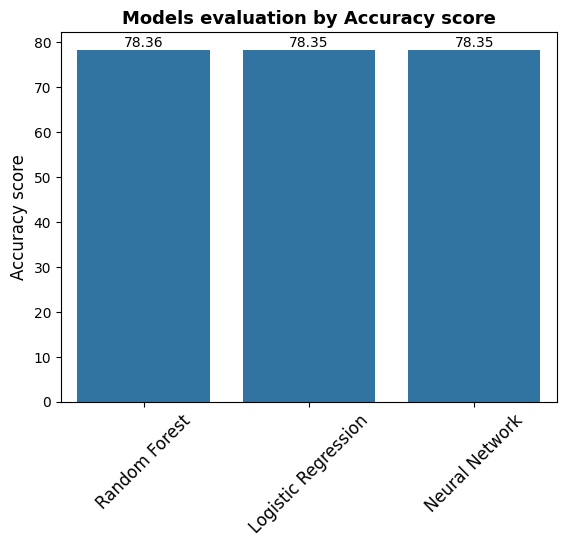

In [42]:
#dd = pd.DataFrame({"scores": scores}, index=names).sort_values("scores", ascending=False)
dd = pd.DataFrame({"scores": optimal_accuracy_score}, index=names).sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(),fontsize = 12, rotation=45)
axes.get_yticklabels(())
axes.set_xlabel("")
axes.set_ylabel("Accuracy score", fontsize = 12, color='black')
axes.set_title("Models evaluation by Accuracy score",fontweight = 'bold', fontsize = 13, color='black')

plt.show()

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_42060\121242523.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),fontsize = 10, rotation=10)


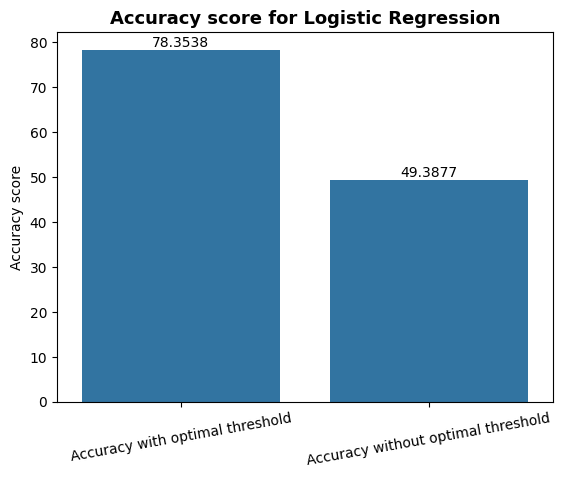

In [49]:
#dd = pd.DataFrame({"scores": scores}, index=names).sort_values("scores", ascending=False)
names_new = ["Accuracy without optimal threshold", "Accuracy with optimal threshold"]
dd = pd.DataFrame({"scores": scores_new}, index=names_new).sort_values("scores", ascending=False)
#dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(),fontsize = 10, rotation=10)
axes.get_yticklabels(())
axes.set_xlabel("")
axes.set_ylabel("Accuracy score", fontsize = 10, color='black')
axes.set_title("Accuracy score for Logistic Regression",fontweight = 'bold', fontsize = 13, color='black')

plt.show()